# Первичное валидирование фотографии.
# Бинарная классификация

Идея данного классификатора состоит в том, чтобы проводить умную валидацию загруженных фотографий. Критерий хорошей, то есть подходящей для дальнейшей разметки фотографии следующий: человек, глядя на фото должен суметь оценить паритет/диспаритет на важном для бизнеса участке торговой точки - то есть лежащие на столе листы с изображением логотипа Yota, или фото сим-карты в руках продавца не подходят (примеры таких изоюражений есть далее).

In [10]:
# import needed libs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
from tensorflow.keras import optimizers

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [5]:
DATA_DIR='/kaggle/input/posm-or-trash/binary_ds/' # dir with dataset imgs

# lablels for classification
CLASSES = [
    'good',
    'trash'
]

In [6]:
# Uploading imgs and add some augmentation
X, y = [], []
datagen = ImageDataGenerator(
    rescale=1.0/255.0, 
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range= 20,
    horizontal_flip=True,
    vertical_flip=True,
)
train_dataset = datagen.flow_from_directory(DATA_DIR, target_size=(224, 224), batch_size=306, shuffle=True)
X, y = next(train_dataset)

Found 306 images belonging to 2 classes.


In [7]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

In [8]:
# class labels as an index
print("Classes as index:", train_dataset.class_indices)
# amount of images in train, val, test part
print(f"X_train: {X_train.shape[0]} images")
print(f"X_val: {X_val.shape[0]} images")
print(f"X_test: {X_test.shape[0]} images")

Classes as index: {'good': 0, 'trash': 1}
X_train: 214 images
X_val: 73 images
X_test: 19 images


Примеры изображений, по которым невозможно определить диспаритет(паритет)


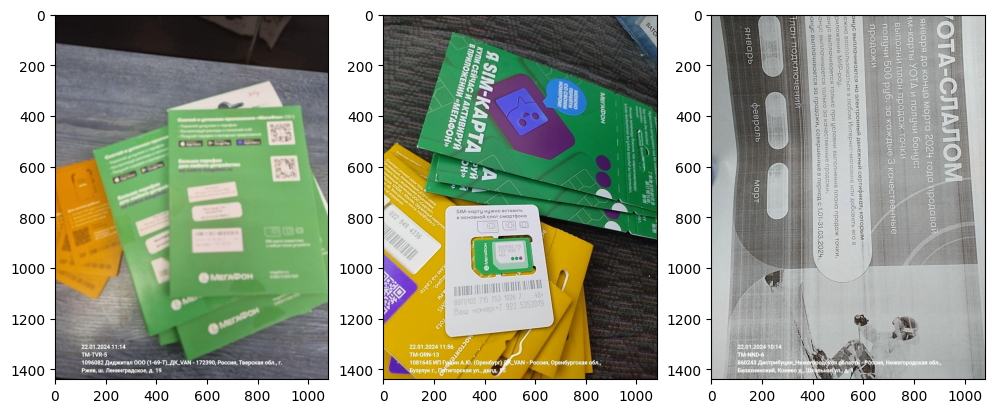

In [8]:
bad_img_example_1= cv2.imread(DATA_DIR + "trash/" + "0.jpg")
bad_img_example_2= cv2.imread(DATA_DIR + "trash/" + "1.jpg")
bad_img_example_3= cv2.imread(DATA_DIR + "trash/" + "100.jpg")
fig, ax = plt.subplots(1,3, figsize=(12,12))
print("Примеры изображений, по которым невозможно определить диспаритет(паритет)")
ax[0].imshow(bad_img_example_1)
ax[1].imshow(bad_img_example_2)
ax[2].imshow(bad_img_example_3)
None

Примеры изображений, по которым возможно определить диспаритет(паритет)


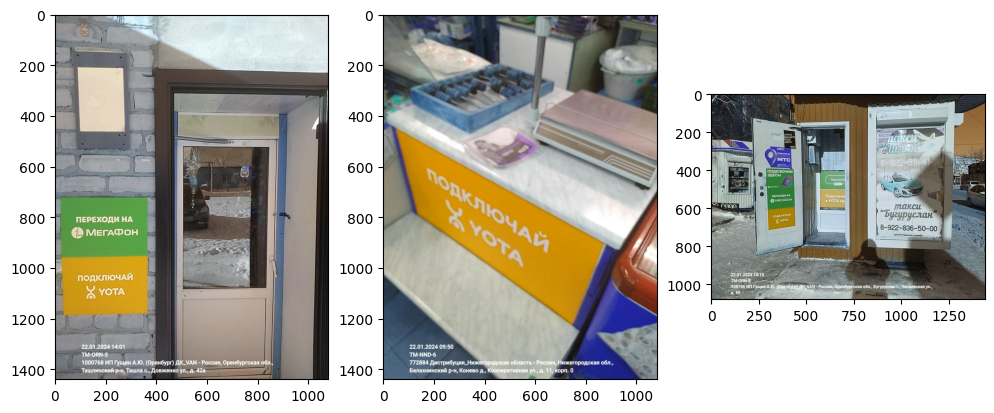

In [9]:
good_img_example_1= cv2.imread(DATA_DIR + "good/" + "59.jpg")
good_img_example_2= cv2.imread(DATA_DIR + "good/" + "104.jpg")
good_img_example_3= cv2.imread(DATA_DIR + "good/" + "92.jpg")
fig, ax = plt.subplots(1,3, figsize=(12,12))
print("Примеры изображений, по которым возможно определить диспаритет(паритет)")
ax[0].imshow(good_img_example_1)
ax[1].imshow(good_img_example_2)
ax[2].imshow(good_img_example_3)
None

In [11]:
base_model = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False)

In [14]:
avg = GlobalAveragePooling2D()(base_model.output)
output = Dense(2, activation="softmax")(avg)
model = Model(inputs=base_model.input, outputs=output)

In [16]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
optimazier = optimizers.SGD(lr=0.2, momentim=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accurasy"])